# The following code is for Geographical Threshold Models

Nodes will be placed randomly in a given Euclidean space, and each node will have a fitness value drawn from some distribution f(x). 

Every pair of N(N-1) nodes will be evaluated to see whether an edge forms, usually as some function of their fitness scores and Euclidean distances apart.

Existing common versions of this model use

(Fitness Distribution) f(x):
* Exponential Distribution
* Power Law
* Uniform on [0, 1]

(Distance Influence) h(r):
* r^-alpha

(Functions of Fitness):
* w + w'
* w * w'

Our novel version will use a normal distribution with mu = 0, sigma = 1, and take |w - w'|h(r) > theta, i.e. the Heavistep function for evaluating if an edge exists between nodes


In [23]:
'''import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections
import seaborn as sns
from scipy.spatial import distance
import powerlaw
import heapq
import os
import gc
import pickle
import math
from sklearn.linear_model import LinearRegression

from base_network_extensions import *'''

from geographical_spatial_strength_extensions import *
from os import listdir
import imp
import sys
import math
import scipy.io as sio

In [2]:
'''
Fitness Evaluation Functions
'''

def normal_difference_heavistep(fitness_i, fitness_j):
  '''
  Expect 2 normally distributed fitnesses
  Check if the absolute difference (distance) between the fitnesses exceeds
  a given threshold
  params:
    fitness_i, fitness_j: fitness values of the two nodes
  TWEAK:
    threshold: value that fitness absolute difference must exceed 
  '''
  threshold = 3.5
  if(abs(fitness_i - fitness_j) > threshold):
    return True
  else:
    return False



def normal_difference_probability(fitness_i, fitness_j):
  '''
  Expect 2 normally distributed fitnesses
  Give absolute difference 
  '''
  pass
  
  

def distance_heavistep(node_i, node_j):
  '''
  Expect 2 node dictionaries that include 'coordinate' keys
  Check if they are close enough (euclidean distance) to form an edge
  params:
    node_i, node_j: dictionary entry of the two nodes (given by G.nodes[i])
  TWEAK:
    threshold: distance that nodes have to be within to form edge
  '''
  threshold = 0.3
  coordinate_i = node_i['coordinate']
  coordinate_j = node_j['coordinate']
  if(distance.euclidean(coordinate_i, coordinate_j) < threshold):
    return True
  else:
    return False
  

def normal_difference_distance_heavistep(node_i, node_j):
  '''
  Expect 2 node dictionaries with both 'coordinate' and 'fitness' keys
  Check if the absolute difference of fitness times a multiplier of 
  distance (euclidean) exceeds a given threshold
  
  |fitness_i - fitness_j| * (dist(i, j))^-a > theta 
  
  params:
    node_i, node_j: dictionary entry of the two nodes (given by G.nodes[i])
  TWEAK:
    threshold: value that fitness times distance modifier must exceed
    alpha: exponent of distance used (will be negative)
  '''
  threshold = 1.5
  alpha = 2
  fitness_i = node_i['fitness']
  fitness_j = node_j['fitness']
  coordinate_i = node_i['coordinate']
  coordinate_j = node_j['coordinate']
  dist = distance.euclidean(coordinate_i, coordinate_j)
  total = (dist ** alpha) * abs(fitness_i - fitness_j)
  if(total > threshold):
    return True
  else:
    return False


def gnp_random(node_i, node_j):
    '''
    Uniformly randomly add edge with probability p
    TWEAK:
        p: probability of adding edge
    '''
    p = 0.05
    if(np.random.uniform() < p):
        return True
    else:
        return False
    
def fully_connected(node_i, node_j):
    '''
    Return True for all edges
    '''
    return True


'''
MODEL GENERATING FUNCTION
This code completes the whole graph generation from initiation to edge evaluation
It is used throughout the rest of the code
'''

'''
Load target_thresholds
'''
target_thresholds = pickle.load(open("target_thresholds.pickle", 'rb'))

def graph_model(n=500, beta=-1.0, size=[100, 100], threshold=False, keep_edge_distances=False):
    '''
    The most important thing to tweak is the threshold
    If no threshold is specified, we will look for the threshold found for n=500 that gives
        mean degree 20
    '''
    if(not threshold):
        threshold = target_thresholds[beta]
    
    g = SimpleSpatialGraph(size=size)
    add_normal_nodes(g, n)

    add_vectorized_eval_edges(g, dimensions=size, threshold=threshold, beta=beta, keep_edge_distances=keep_edge_distances)
    return g

In [5]:
'''
Load graphs and target_thresholds
'''
target_thresholds = pickle.load(open("target_thresholds.pickle", 'rb'))
graphs = pickle.load(open("n500graphs3.pickle", 'rb'))

EOFError: Ran out of input

In [8]:
num_graphs = 30
betas = [0.0, -0.5, -1.0, -1.5, -2.0, -2.5, -3.0]
graphs = {}
for beta in betas:
    print('set: ' + str(beta))
    beta_array = []
    for i in range(num_graphs):
        beta_array.append(graph_model(beta=beta))
    graphs[str(beta)] = beta_array

set: 0.0
set: -0.5


C:\Users\Andy\Desktop\Work\github\networks\fitness\geographical_spatial_strength_extensions.py:88: RuntimeWarning: divide by zero encountered in power
  distances = np.where(distances > 1, distances ** beta, 1)


set: -1.0


C:\Users\Andy\Desktop\Work\github\networks\fitness\geographical_spatial_strength_extensions.py:88: RuntimeWarning: divide by zero encountered in reciprocal
  distances = np.where(distances > 1, distances ** beta, 1)


set: -1.5
set: -2.0
set: -2.5
set: -3.0


In [8]:
num_graphs = 30
betas = [0.0, -0.5, -1.0, -1.5, -2.0, -2.5, -3.0]
graphs = {}
for beta in betas:
    print('set: ' + str(beta))
    beta_array = []
    for i in range(num_graphs):
        beta_array.append(graph_model(beta=beta))
    graphs[str(beta)] = beta_array

set: 0.0
set: -0.5


C:\Users\Andy\Desktop\Work\github\networks\fitness\geographical_spatial_strength_extensions.py:88: RuntimeWarning: divide by zero encountered in power
  distances = np.where(distances > 1, distances ** beta, 1)


set: -1.0


C:\Users\Andy\Desktop\Work\github\networks\fitness\geographical_spatial_strength_extensions.py:88: RuntimeWarning: divide by zero encountered in reciprocal
  distances = np.where(distances > 1, distances ** beta, 1)


set: -1.5
set: -2.0
set: -2.5
set: -3.0


In [9]:
pickle.dump(graphs, open('datasets/results/geographical_threshold.pickle', 'wb'))

In [20]:
spatial_strengths = {}
for beta in betas:
    print('set: ' + str(beta))
    beta_array = []
    for i in range(num_graphs):
        g = graphs[str(beta)][i]
        _, spatial_strength = report_spatial_strength_centrality(g, ret=True, graph=False, print_result=True, normalized=4)
        beta_array.append(spatial_strength)
    spatial_strengths[str(beta)] = beta_array

set: 0.0
Average Spatial Strength: 0.193539645784
Average Spatial Strength: 0.147871645006
Average Spatial Strength: 0.177585933583
Average Spatial Strength: 0.170191517219
Average Spatial Strength: 0.178067200877
Average Spatial Strength: 0.149334882985
Average Spatial Strength: 0.159039656203
Average Spatial Strength: 0.171278477092
Average Spatial Strength: 0.167837990303
Average Spatial Strength: 0.159104432592
Average Spatial Strength: 0.181581253792
Average Spatial Strength: 0.193322527037
Average Spatial Strength: 0.224370461746
Average Spatial Strength: 0.17336913672
Average Spatial Strength: 0.188922470327
Average Spatial Strength: 0.155570277161
Average Spatial Strength: 0.150791608549
Average Spatial Strength: 0.172498091956
Average Spatial Strength: 0.190688035901
Average Spatial Strength: 0.132310221227
Average Spatial Strength: 0.169164284311
Average Spatial Strength: 0.114552421204
Average Spatial Strength: 0.112754970966
Average Spatial Strength: 0.174149244366
Average 

Average Spatial Strength: 0.991130210365
Average Spatial Strength: 1.00250900956
Average Spatial Strength: 0.967484421413
Average Spatial Strength: 1.00142381415
Average Spatial Strength: 0.956440292228
Average Spatial Strength: 0.973166441409
Average Spatial Strength: 0.96233325201
Average Spatial Strength: 0.960892019615
Average Spatial Strength: 0.979055241723
Average Spatial Strength: 0.974547747798
Average Spatial Strength: 0.97712498477


In [22]:
pickle.dump(spatial_strengths, open('datasets/results/spatial models/geographical_threshold_spatial_strengths.pickle', 'wb'))

In [21]:
spatial_strengths[str(0.0)]

[0.19353964578353558,
 0.14787164500632641,
 0.17758593358333633,
 0.17019151721862538,
 0.17806720087721295,
 0.14933488298489223,
 0.15903965620296917,
 0.17127847709194841,
 0.16783799030323923,
 0.15910443259185025,
 0.18158125379199763,
 0.19332252703683256,
 0.22437046174634512,
 0.1733691367202902,
 0.18892247032733017,
 0.15557027716089922,
 0.15079160854868237,
 0.17249809195604562,
 0.19068803590133615,
 0.13231022122736011,
 0.16916428431133196,
 0.11455242120376233,
 0.11275497096598069,
 0.17414924436610948,
 0.18847128685446804,
 0.13258491341684486,
 0.17268004610161664,
 0.14235648721456454,
 0.14344491673029472,
 0.1633361074226039]

# Main functions

## Classes
SimpleGraph:
    Create a networkx graph where G.add_node() creates a new node and labels it with an automatically incrementing value

SimpleSpatialGraph:
    Create a SimpleGraph with coordinates, if no coordinate value is passed in G.add_node, coordinates will be selected 
    uniformly at random
    
## Functions
add_normal_nodes(G, n):
    Add n nodes with fitness drawn from normal distribution

add_fitness_edges(G, eval_func):
    Evaluate all pairs of nodes using the given eval_func
    use for normal_difference_heavistep and normal_difference_probability
    should probably standardize to just use add_eval_edges for all methods

add_eval_edges(G, eval_func):
    More generic version that passes the entire node dictionary (so both fitness and coordinates) for eval


values received
values received
values received
values received


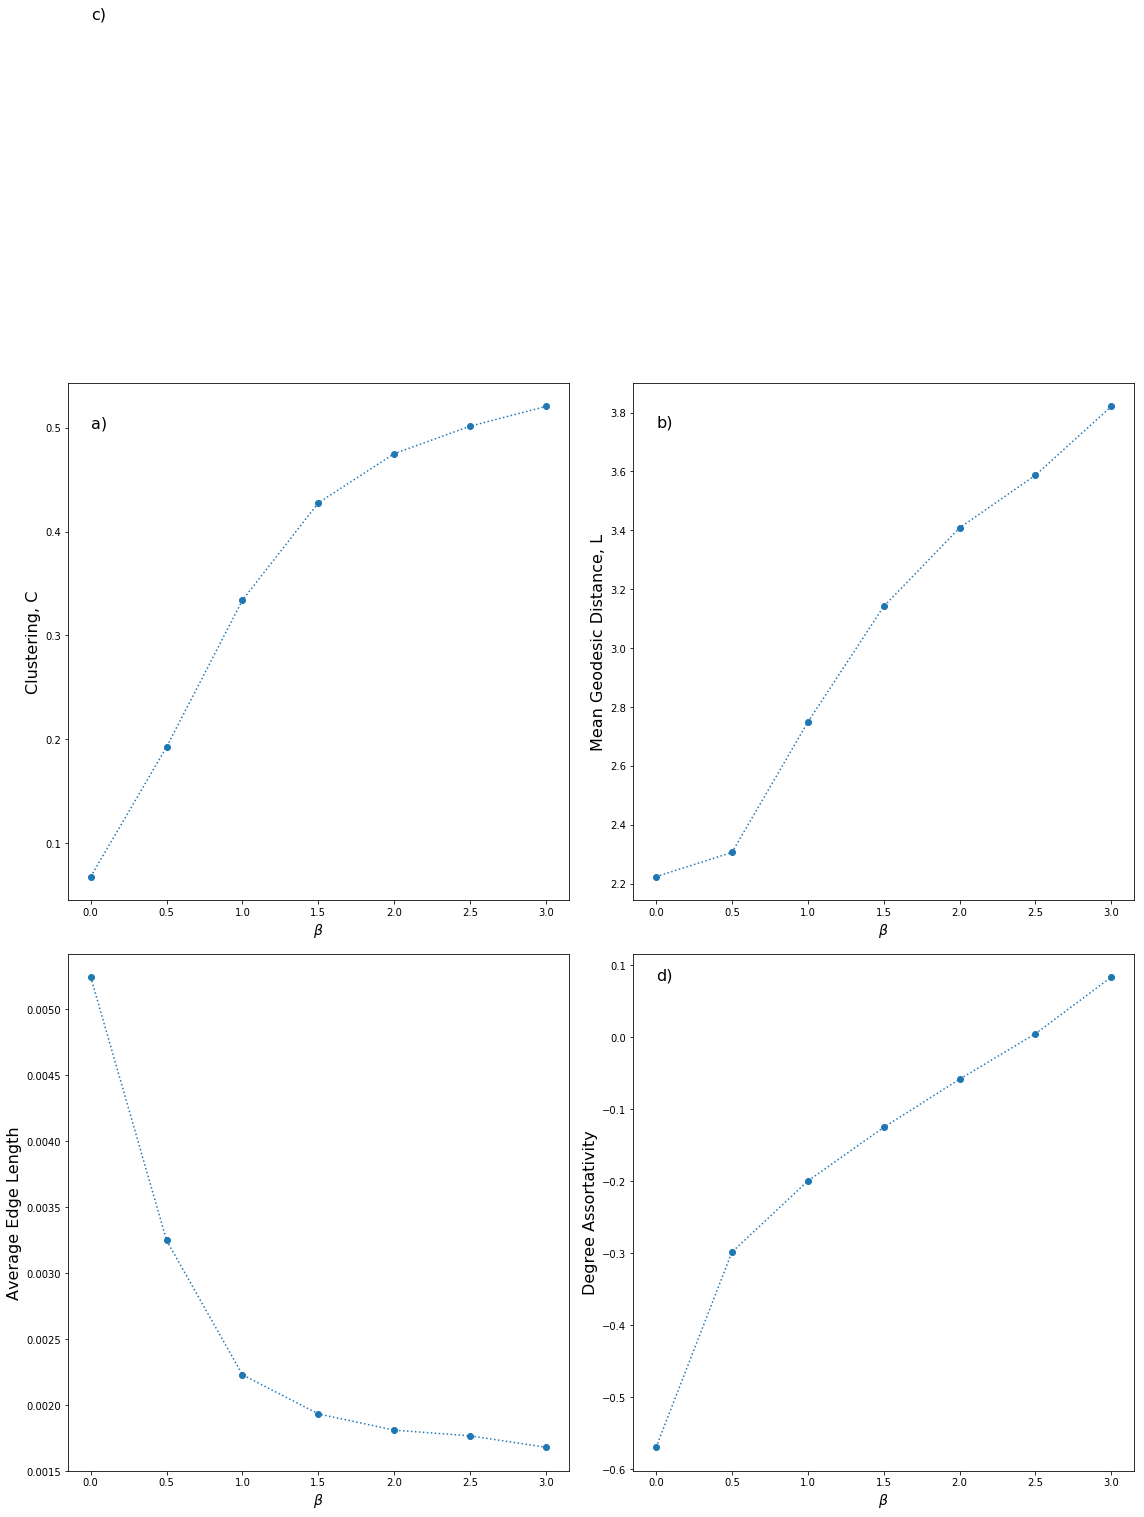

In [111]:
analysis_types = pickle.load(open('geographic_threshold_measurements.pickle', 'rb'))
# analysis_types = {
#     'clustering': {}, 
#     'geodesic': {}, 
#     'average_edge_length': {},
#     'degree_assortativity': {}
# }
plot_types = ['clustering', 'geodesic', 'average_edge_length', 'degree_assortativity']
text_label = ['a)', 'b)', 'c)', 'd)']
pos = [[0, 0.5], [0, 3.75], [0, 0.0125], [0, 0.08]]

plt.figure(figsize=(16, 16))
for i, analysis_type in enumerate(plot_types):
    subplot = [2, 2, i+1]
    analysis_types[analysis_type] = analyze_graphs_with_function(analysis_type, verbose=0, 
                                 betas=[0.0, -0.5, -1.0, -1.5, -2.0, -2.5, -3.0],
                                 values=analysis_types[analysis_type],
                                subplot=subplot)
    plt.text(pos[i][0], pos[i][1], text_label[i], fontsize=16)

plt.tight_layout()
plt.savefig('figures/geographical_network_metrics3')

-0.5, -1.0, -1.5, -2.0, -2.5, -3.0, 0.0, -0.9, -0.8, -0.7, -0.6, -0.4, -0.3, -0.2, -0.1, 

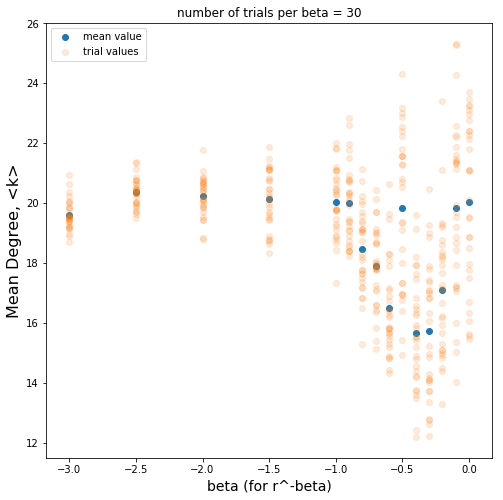

In [71]:
analyze_graphs_with_function('mean_degree', False)

-0.5, -1.0, -1.5, -2.0, -2.5, -3.0, 0.0, 

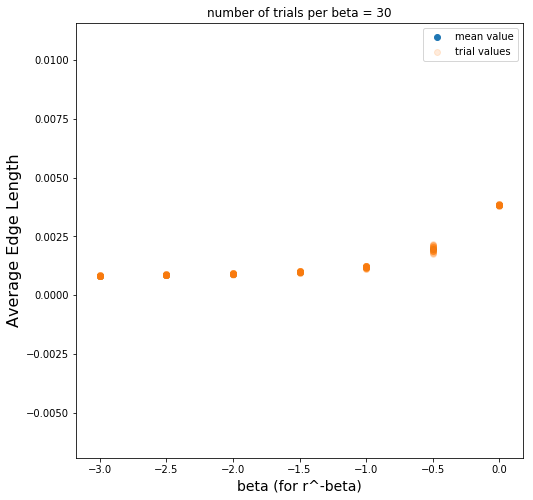

In [24]:
analyze_graphs_with_function('average_edge_length', False)

-0.5, -1.0, -1.5, -2.0, -2.5, -3.0, 0.0, 

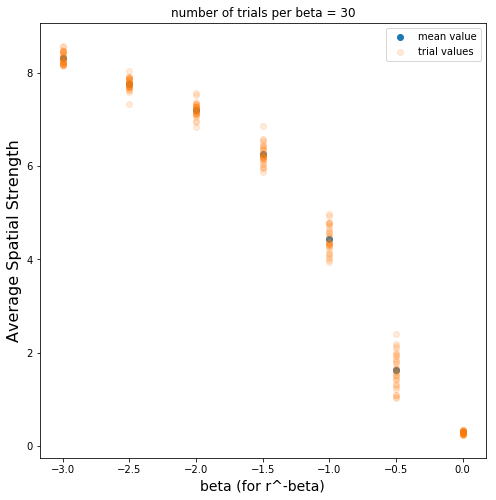

In [29]:
analyze_graphs_with_function('average_spatial_strength', False)

-0.5, -1.0, -1.5, -2.0, -2.5, -3.0, 0.0, -0.9, -0.8, -0.7, -0.6, -0.4, -0.3, -0.2, -0.1, 

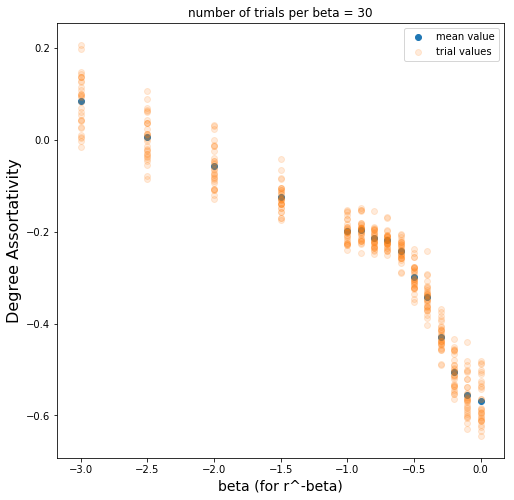

In [72]:
analyze_graphs_with_function('degree_assortativity', False)

-0.5, -1.0, -1.5, -2.0, -2.5, -3.0, 0.0, -0.9, -0.8, -0.7, -0.6, -0.4, -0.3, -0.2, -0.1, 

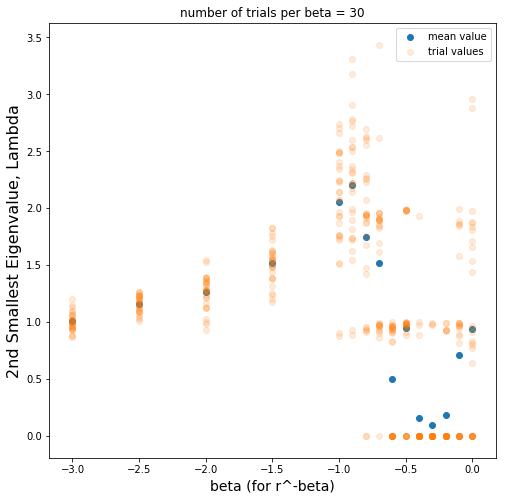

In [74]:
analyze_graphs_with_function('laplacian_spectrum', False)

-0.5, -1.0, -1.5, -2.0, -2.5, -3.0, 0.0, -0.9, -0.8, -0.7, -0.6, -0.4, -0.3, -0.2, -0.1, 

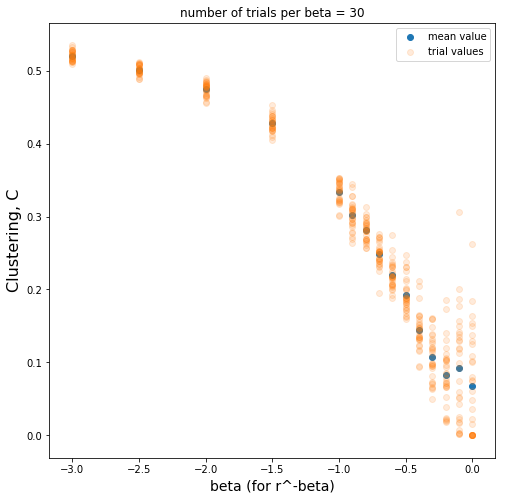

In [73]:
analyze_graphs_with_function('clustering', False)

In [ ]:
analyze_graphs_with_function('clustering_ratio', False)

-0.5, -1.0, -1.5, -2.0, -2.5, -3.0, 

-0.5, Exception raised, graph likely not connected.                     Trial 9, beta = -0.500000
Exception raised, graph likely not connected.                     Trial 11, beta = -0.500000
Exception raised, graph likely not connected.                     Trial 12, beta = -0.500000
Exception raised, graph likely not connected.                     Trial 13, beta = -0.500000
Exception raised, graph likely not connected.                     Trial 21, beta = -0.500000
Exception raised, graph likely not connected.                     Trial 22, beta = -0.500000
Exception raised, graph likely not connected.                     Trial 23, beta = -0.500000
Exception raised, graph likely not connected.                     Trial 29, beta = -0.500000
-1.0, -1.5, -2.0, -2.5, -3.0, 

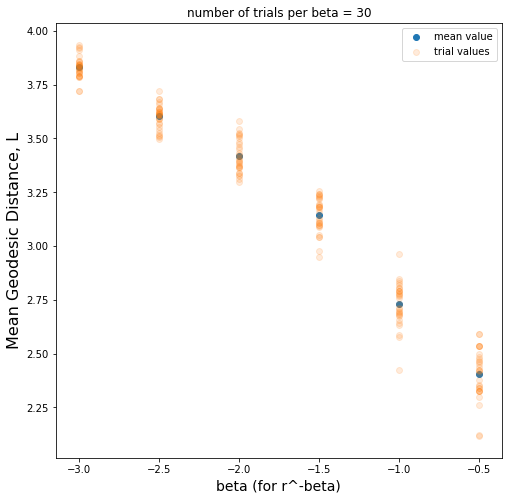

In [75]:
analyze_graphs_with_function('geodesic', False)

In [25]:
listdir('datasets/road_data_2km/US_2km')[0]

'Austin_networkx_unit.pdf'

In [ ]:
cities = []
for file in listdir('datasets/road_data_2km/' + 'US_2km'):
    if('.pdf') in file:
        city = file.split('.pdf')[0]
        cities.append(city)